In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from prettytable import PrettyTable 
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import dill

In [30]:
dill.load_session('notebookk1to2.db')

### knn-3 imputed data with standard scalar was used in Task 1 

In [ ]:
#df_train_3_knnna_stdsc,y_train
#df_test_3_knnna_stdsc,y_test

In [ ]:
Lr= LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
lr.fit(df_train_3_knnna_stdsc,y_train)


In [45]:
print(df_train_3_knnna_stdsc.shape)
print(y_train.shape)
print(df_test_3_knnna_stdsc.shape)
print(y_test.shape)

(670, 11)
(670, 1)
(330, 11)
(330, 1)


In [41]:
polytrans = PolynomialFeatures(degree=2)
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
pipeline = Pipeline(steps=[('t', polytrans), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, df_train_3_knnna_stdsc, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.733 (0.045)


In [42]:
polytrans = PolynomialFeatures(degree=3)
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
pipeline = Pipeline(steps=[('t', polytrans), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, df_train_3_knnna_stdsc, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.716 (0.045)


In [43]:
polytrans = PolynomialFeatures(degree=4)
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
pipeline = Pipeline(steps=[('t', polytrans), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, df_train_3_knnna_stdsc, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.697 (0.047)


In [44]:
polytrans = PolynomialFeatures(degree=5)
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
pipeline = Pipeline(steps=[('t', polytrans), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, df_train_3_knnna_stdsc, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.695 (0.045)


In [33]:
n_scores

array([0.73134328, 0.67164179, 0.73134328, 0.65671642, 0.7761194 ,
       0.68656716, 0.74626866, 0.65671642, 0.73134328, 0.74626866,
       0.71641791, 0.76119403, 0.68656716, 0.71641791, 0.68656716,
       0.7761194 , 0.65671642, 0.74626866, 0.73134328, 0.73134328,
       0.76119403, 0.79104478, 0.67164179, 0.70149254, 0.62686567,
       0.74626866, 0.65671642, 0.80597015, 0.70149254, 0.68656716])

In [38]:
num_features = []
degress = [i for i in range(1, 6)]

Degree: 1, Features: 12
Degree: 2, Features: 78
Degree: 3, Features: 364
Degree: 4, Features: 1365
Degree: 5, Features: 4368


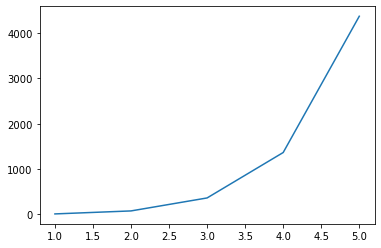

In [40]:
for d in degress:
    # create transform
    trans = PolynomialFeatures(degree=d)
    # fit and transform
    res = trans.fit_transform(df_train_3_knnna_stdsc)
    # record number of features
    num_features.append(res.shape[1])
    # summarize
    print('Degree: %d, Features: %d' % (d, res.shape[1]))
# plot degree vs number of features
plt.plot(degress, num_features)
plt.show()

In [47]:
polytrans = PolynomialFeatures(degree=2)
x=polytrans.fit_transform(df_train_3_knnna_stdsc)
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model.fit(x,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [49]:
xtst=polytrans.fit_transform(df_test_3_knnna_stdsc)

In [71]:
polytrans = PolynomialFeatures(degree=3)
x3t=polytrans.fit_transform(df_train_3_knnna_stdsc)

In [72]:
x3t.shape

(670, 364)

In [69]:
y_train.shape

(670, 1)

In [50]:
y_train_pred = model.predict(x)
y_test_pred = model.predict(xtst)

In [53]:
mae_train=mean_absolute_error(y_train, y_train_pred)
mae_test=mean_absolute_error(y_test, y_test_pred)

In [56]:
mae_train

0.25223880597014925

In [55]:
mae_test

0.296969696969697

In [62]:
title = "Degree2polynomial"

Automatically created module for IPython interactive environment


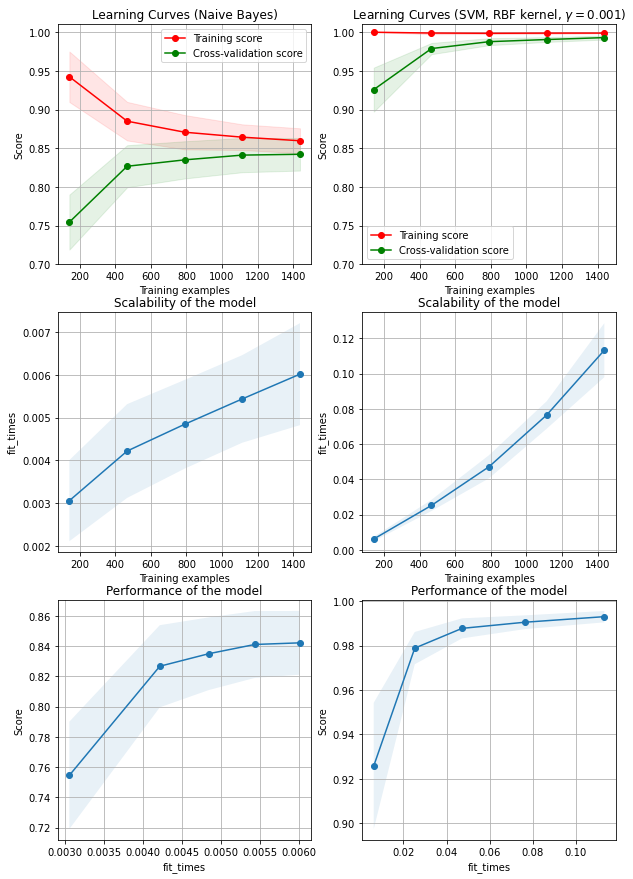

In [57]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

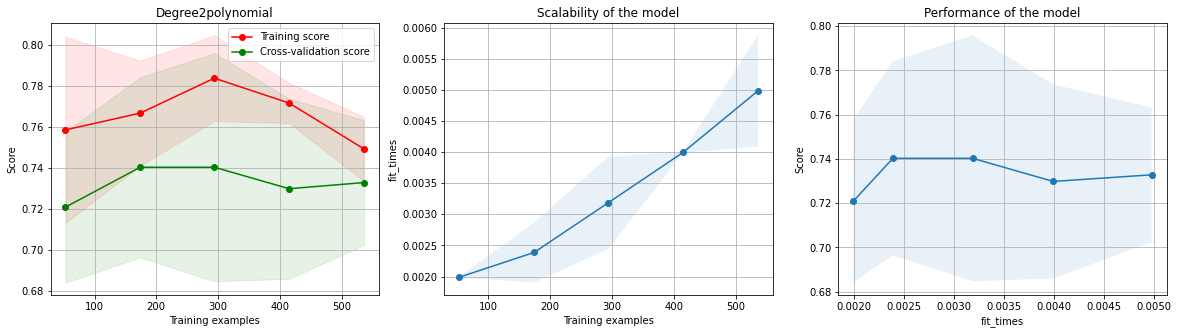

In [63]:
plot_learning_curve(model, title, x, y_train, n_jobs=-1)
plt.show()

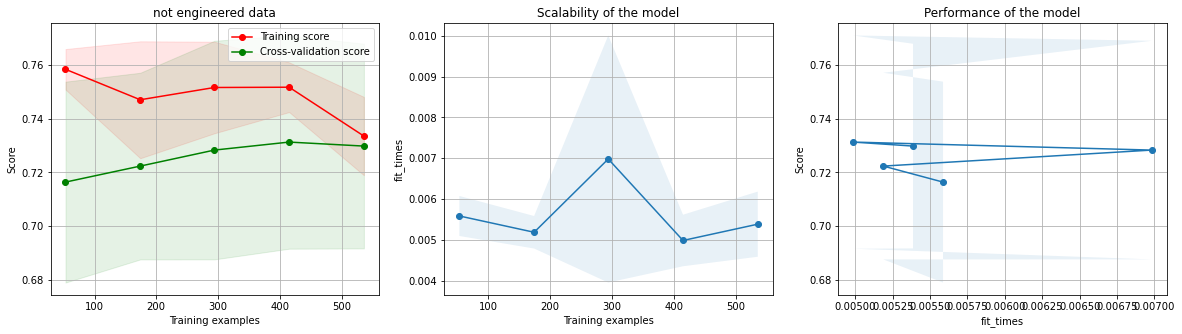

In [64]:
title="not engineered data"
plot_learning_curve(model, title,df_train_3_knnna_stdsc,y_train, n_jobs=-1)
plt.show()

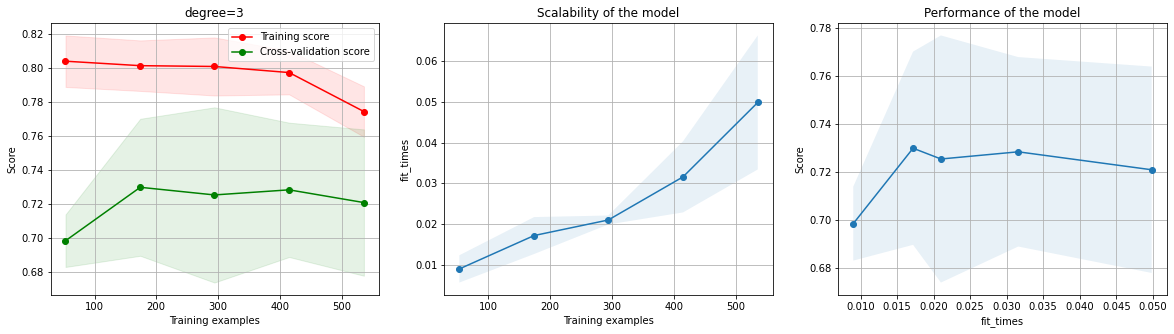

In [73]:
title="degree=3"
plot_learning_curve(model, title,x3t,y_train, n_jobs=-1)
plt.show()